In [1]:
import os
import csv
import re

# Directory containing the raw data
raw_data_directory = r"F:\IIT_MANDI\SMELL\Kato_et_al\RawData"

# Initialize a list to store the extracted data
extracted_data = []

# Iterate through files in the directory
for file_name in os.listdir(raw_data_directory):
    # Check if file is a text file
    if file_name.endswith(".txt"):
        # Read the text file
        text_file_path = os.path.join(raw_data_directory, file_name)
        with open(text_file_path, 'r') as text_file:
            lines = text_file.readlines()
            # Iterate through each line and extract data
            for line in lines:
                # Split the line by comma and extract required data
                data = line.strip().split(',')
                # Check if the line has at least three elements
                if len(data) >= 3:
                    # Extract smell ID and smell intensity
                    smell_id = data[1].strip()
                    smell_intensity = data[2].strip()
                    # Extract file name without extension and sub section from file name
                    file_name_without_extension = os.path.splitext(file_name)[0]
                    sub_section = re.search(r'_s\d+_\d+', file_name_without_extension).group()
                    # Append to extracted data
                    extracted_data.append({
                        'File Name': file_name,
                        'Sub Section': sub_section,
                        'Smell ID': smell_id,
                        'Smell Intensity': smell_intensity
                    })

# Write extracted data to a CSV file
output_directory = r"F:\IIT_MANDI\SMELL\OUTPUT_CSV"
os.makedirs(output_directory, exist_ok=True)  # Create directory if it doesn't exist
csv_file_path = os.path.join(output_directory, "all_extracted_data.csv")
with open(csv_file_path, 'w', newline='') as csv_file:
    fieldnames = ['File Name', 'Sub Section', 'Smell ID', 'Smell Intensity']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for data in extracted_data:
        writer.writerow(data)

print("CSV file created successfully:", csv_file_path)


CSV file created successfully: F:\IIT_MANDI\SMELL\OUTPUT_CSV\all_extracted_data.csv


In [2]:
df = pd.read_csv(r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\all_extracted_data.csv")
print(df)

NameError: name 'pd' is not defined

In [36]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\all_extracted_data.csv")

# Calculate skewness
skewness = df['Smell Intensity'].skew()

# Define a threshold for skewness
skew_threshold = 0.5  # You can adjust this threshold as needed

# Check if the skewness exceeds the threshold
if abs(skewness) > skew_threshold:
    print("The data is skewed (skewness =", skewness, ")")
else:
    print("The data is not skewed (skewness =", skewness, ")")


The data is not skewed (skewness = -0.17977454868007495 )


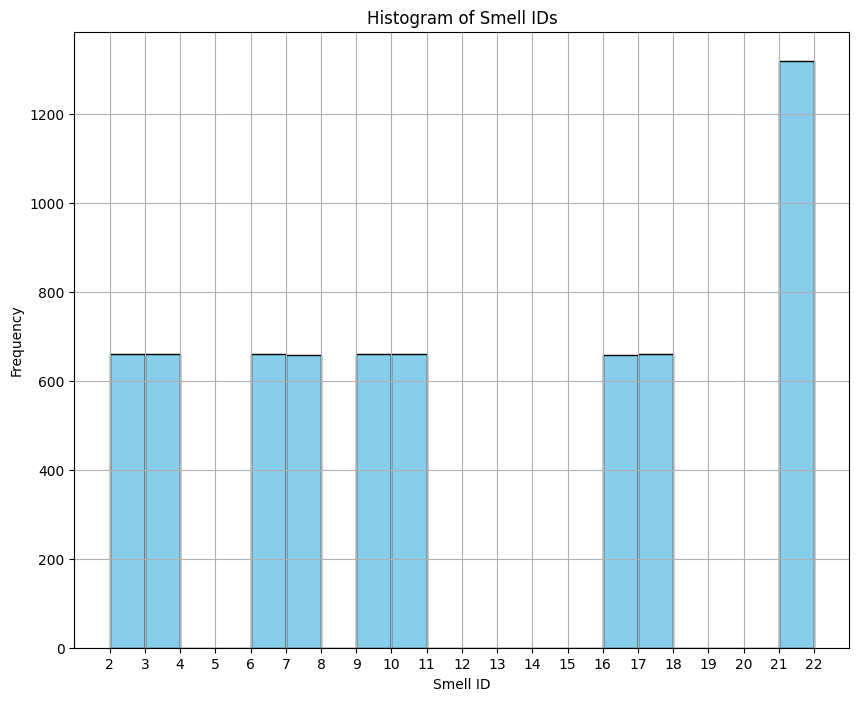

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\all_extracted_data.csv")

# Plot a histogram of the "Smell ID" values
plt.figure(figsize=(10, 8))
plt.hist(df['Smell ID'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Smell ID')
plt.ylabel('Frequency')
plt.title('Histogram of Smell IDs')
plt.grid(True)

# Set custom tick locations for the x-axis
plt.xticks(range(df['Smell ID'].min(), df['Smell ID'].max()+1))

plt.show()


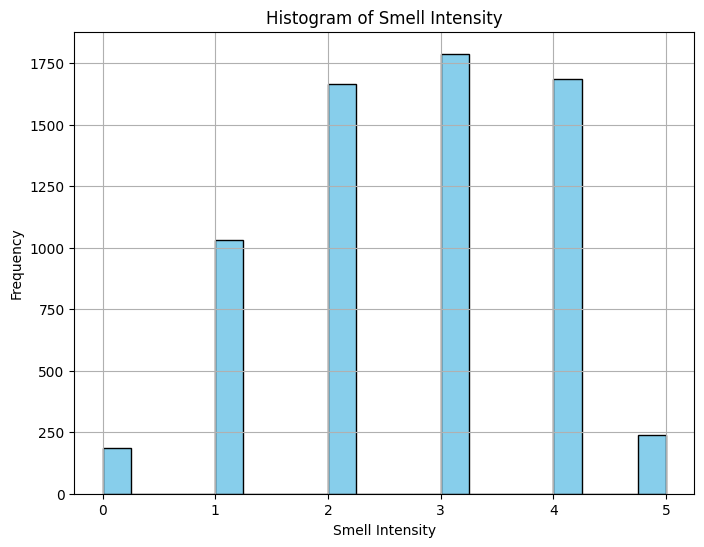

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\all_extracted_data.csv")

# Plot a histogram of the "Smell Intensity" values
plt.figure(figsize=(8, 6))
plt.hist(df['Smell Intensity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Smell Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Smell Intensity')
plt.grid(True)
plt.show()


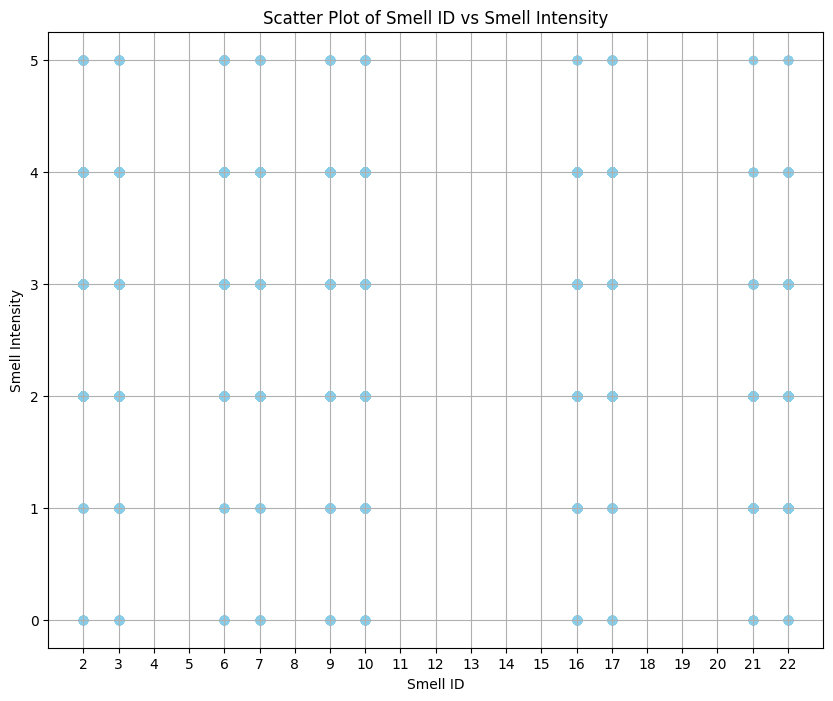

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\all_extracted_data.csv")

# Plot a scatter plot of Smell ID vs Smell Intensity
plt.figure(figsize=(10, 8))
plt.scatter(df['Smell ID'], df['Smell Intensity'], color='skyblue')
plt.xlabel('Smell ID')
plt.ylabel('Smell Intensity')
plt.title('Scatter Plot of Smell ID vs Smell Intensity')
plt.grid(True)

# Set custom tick locations for the x-axis
plt.xticks(range(int(df['Smell ID'].min()), int(df['Smell ID'].max())+1))

plt.show()


In [9]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\all_extracted_data.csv")

# Define a function to apply the condition
def assign_target(Pleasant_Intensity):
    if Pleasant_Intensity >= 3:
        return "Pleasant" 
    else:
        return "Unpleasant"

# Apply the function to create the new column 'Target'
df['Pleasent Nature'] = df['Pleasant Intensity'].apply(lambda x: assign_target(x))

# Save the updated DataFrame to a new CSV file
output_csv_path = r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\Pleasent_data.csv"
df.to_csv(output_csv_path, index=False)

print("Pleasant data file saved successfully at:", output_csv_path)


Pleasant data file saved successfully at: F:\IIT_MANDI\SMELL\OUTPUT_CSV\Pleasent_data.csv


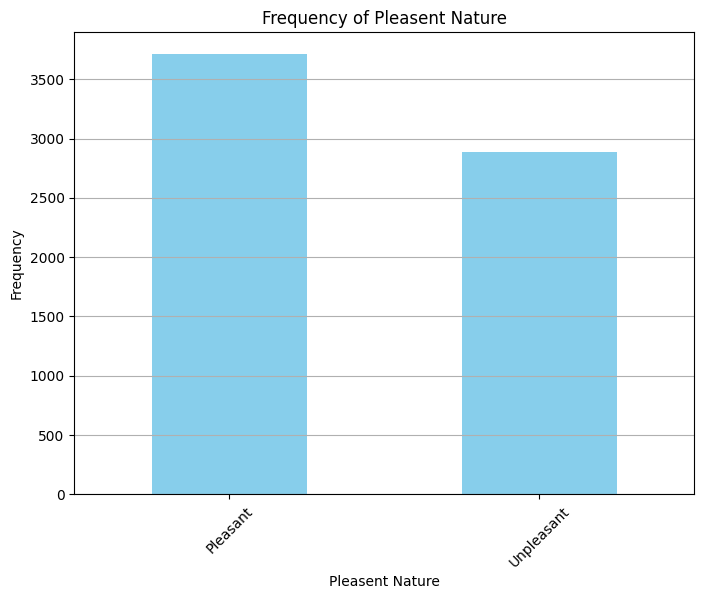

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\Pleasent_data.csv")

# Count the frequency of each 'Pleasent Nature' category
frequency = df['Pleasent Nature'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
frequency.plot(kind='bar', color='skyblue')
plt.xlabel('Pleasent Nature')
plt.ylabel('Frequency')
plt.title('Frequency of Pleasent Nature')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
